In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_context("poster", font_scale=1.5)

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        # 2 input units and 10 hiden units
        self.hidden_layer = torch.nn.Linear(2, 10)
        self.output_layer = torch.nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.sigmoid(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

## Model initialization

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Net = Network().to(device)

## Loss function

In [3]:
criterion = nn.MSELoss()
Net_optimizer = optim.Adam(Net.parameters(), lr = 0.1)

def Net_train(x):
    Net.zero_grad()
    output = Net(x)
    rule = (x[:, 0] - 0.5).pow(2) + (x[:, 1] - 0.6).pow(2) < 0.4**2
    loss = criterion(output, rule.reshape(-1, 1).float())
    loss.backward()
    Net_optimizer.step()
    return loss.data.item()

## Training data generation

In [4]:
# np.random.seed(234546)
# train_data = torch.from_numpy(np.random.rand(100, 2)).float().to(device)
# test_data = torch.from_numpy(np.random.rand(100, 2)).float().to(device)
train_data = torch.rand(100, 2, device=device)
test_data = torch.rand(100, 2, device=device)
target = (test_data[:, 0] - 0.5).pow(2) + (test_data[:, 1] - 0.6).pow(2) < 0.4**2
label = (train_data[:, 0] - 0.5).pow(2) + (train_data[:, 1] - 0.6).pow(2) < 0.4**2
color = ['#e5a47f' if i else '#4c72b0' for i in label]
# fig, ax = plt.subplots()
# fig.set_size_inches(10, 10)
# ax.scatter(train_data[:, 0].cpu(), train_data[:, 1].cpu(), c=color)
# ax.set_xlabel('x')
# ax.set_ylabel('y')

[10/100]: loss: 0.218
[20/100]: loss: 0.177
[30/100]: loss: 0.163
[40/100]: loss: 0.156
[50/100]: loss: 0.149
[60/100]: loss: 0.140
[70/100]: loss: 0.128
[80/100]: loss: 0.111
[90/100]: loss: 0.095
[100/100]: loss: 0.086


Text(0, 0.5, 'Loss')

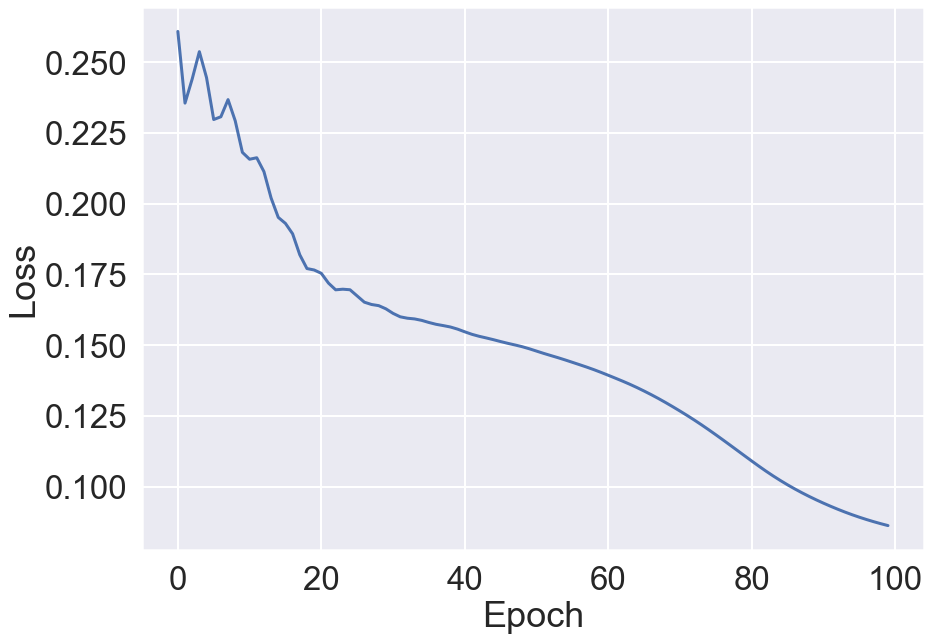

In [61]:
n_epoch = 100
for layer in Net.children():
   if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()

total_loss = []
for epoch in range(1, n_epoch+1):
    losses = []
    losses.append(Net_train(train_data))
    total_loss.append(torch.mean(torch.FloatTensor(losses)))
    if not epoch % 10:
        print('[%d/%d]: loss: %.3f' %(epoch, n_epoch, torch.mean(torch.FloatTensor(losses))))

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
ax.plot(total_loss)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

## Plot hyperplane

In [38]:
def plotLinear(ax, weight, bias):
    x = np.arange(0, 1, 0.01)
    ax.plot(x, x*weight+bias, c="#5ea5c5")

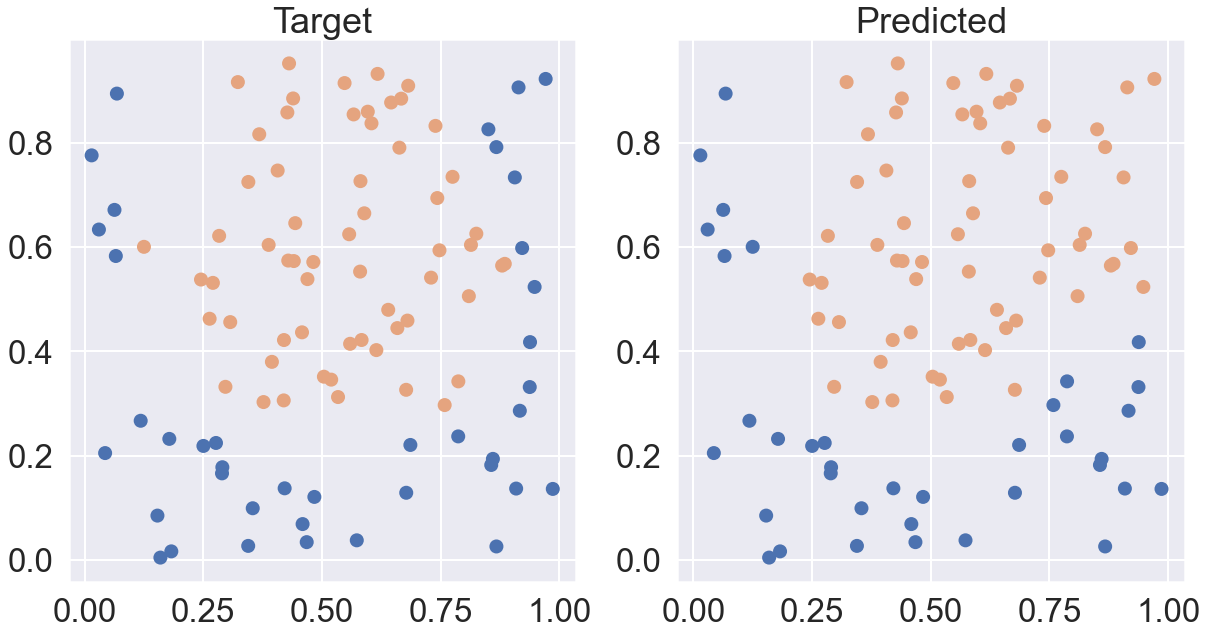

In [62]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)
color = ['#e5a47f' if i else '#4c72b0' for i in target]
color_o = ['#e5a47f' if i>0.5 else '#4c72b0' for i in Net(test_data)]
ax[0].scatter(test_data[:, 0].cpu(), test_data[:, 1].cpu(), c=color)
ax[0].set_title("Target")
ax[1].set_title("Predicted")
ax[1].scatter(test_data[:, 0].cpu(), test_data[:, 1].cpu(), c=color_o)
# bias = Net.hidden_layer.bias.cpu().detach().numpy().reshape(10, 1)
# weights = Net.hidden_layer.weight.cpu().detach().numpy().reshape(10, 1)
# print(weights)
# for i in range(10):
#     plotLinear(ax[1], weights[i], bias[i])
# Net(test_data)
# ax.set_xlabel('x')
# ax.set_ylabel('y')


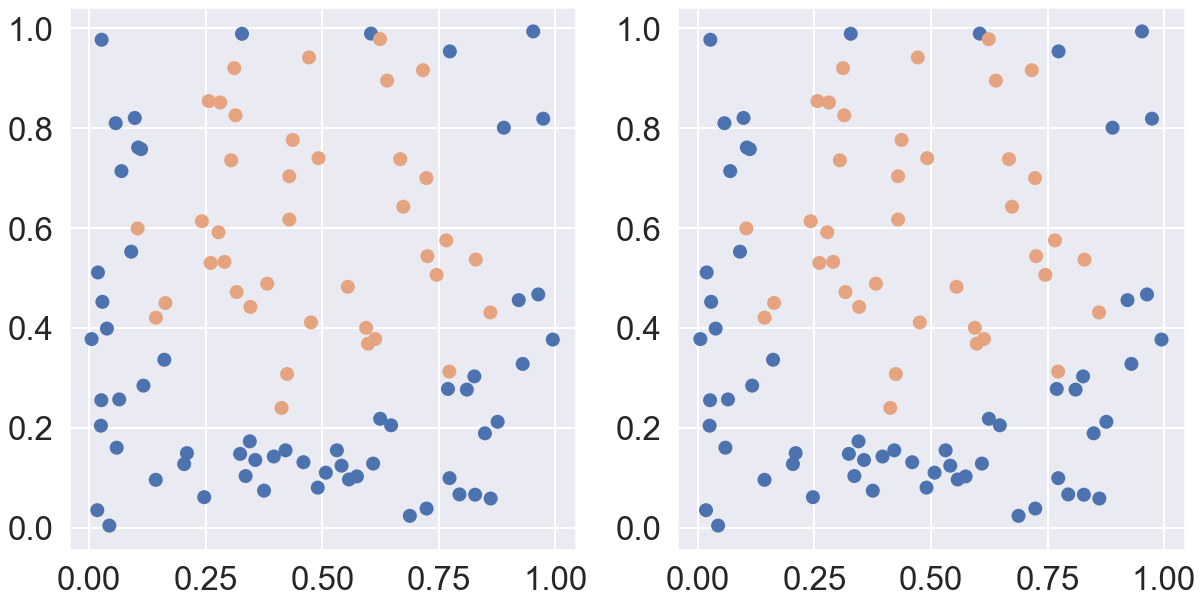

In [18]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)
color = ['#e5a47f' if i else '#4c72b0' for i in label]
color_o = ['#e5a47f' if i>0.5 else '#4c72b0' for i in Net(train_data)]
ax[0].scatter(train_data[:, 0].cpu(), train_data[:, 1].cpu(), c=color)
ax[1].scatter(train_data[:, 0].cpu(), train_data[:, 1].cpu(), c=color_o)

In [55]:
for parameter in Net.parameters():
    print(parameter)
print(Net.hidden_layer.bias)

Parameter containing:
tensor([[  8.4268, -14.5505],
        [  2.6479,  12.2595],
        [-10.7821,   5.0496],
        [  5.0088,   5.0646],
        [ -5.0391,   0.9718],
        [ -4.5640,  -4.2883],
        [ -9.8696,   0.7833],
        [-13.9398,  -1.5032],
        [ -0.2462,   1.2430],
        [ -3.5124,  -1.6671]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-1.6225, -3.6394, -2.1343, -7.4375, -1.6239,  0.7476, -0.3303,  2.2668,
        -1.6214, -1.7420], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-5.6823,  4.2817, -3.0068, -5.0113, -0.9058, -1.5252, -2.2313, -3.7858,
         -0.2213, -0.9189]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.5820], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-1.6225, -3.6394, -2.1343, -7.4375, -1.6239,  0.7476, -0.3303,  2.2668,
        -1.6214, -1.7420], device='cuda:0', requires_grad=True)
